In [12]:
import os
import sys
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import pathlib
import numpy as np
import random
from tensorflow import keras
from numpy import expand_dims
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.22621-SP0
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Pandas 1.5.1
Scikit-Learn 1.1.3
SciPy 1.9.3
GPU is available


In [13]:
img_height = 100
img_width = 100

train_root = pathlib.Path('../../FruitScale/data/Training')
train_root = train_root.resolve()

test_root = pathlib.Path('../../FruitScale/data/Test')
test_root = test_root.resolve()

image_count = len(list(train_root.glob('*/*.jpg')))

random.seed(42)

In [14]:
# Creating the data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=[0.8, 1.1],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="constant",
    cval=255
)

In [15]:
# Getting all the labels (folders)
all_image_paths = list(train_root.glob('*/*'))

train_labels = [str(path.parent.name) for path in all_image_paths]

all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
#print(image_count)

all_labels = set(train_labels)
print(all_labels)

{'Pear Williams', 'Peach', 'Plum', 'Cucumber Ripe', 'Pomegranate', 'Raspberry', 'Orange', 'Physalis', 'Pepino', 'Onion White', 'Tomato 4', 'Pear Abate', 'Kumquats', 'Cherry Rainier', 'Mango', 'Rambutan', 'Tamarillo', 'Tomato Heart', 'Potato Red Washed', 'Pepper Yellow', 'Pineapple Mini', 'Pear Kaiser', 'Pitahaya Red', 'Grapefruit Pink', 'Apple Golden 2', 'Pear Monster', 'Apricot', 'Kohlrabi', 'Strawberry', 'Apple Granny Smith', 'Huckleberry', 'Peach Flat', 'Walnut', 'Apple Golden 3', 'Papaya', 'Strawberry Wedge', 'Cantaloupe 2', 'Pear', 'Tomato not Ripened', 'Mandarine', 'Mangostan', 'Nectarine Flat', 'Kaki', 'Lemon Meyer', 'Pear Red', 'Tomato 2', 'Grape Pink', 'Beetroot', 'Grapefruit White', 'Cherry Wax Red', 'Pepper Orange', 'Apple Braeburn', 'Pear Stone', 'Peach 2', 'Potato Red', 'Tomato Yellow', 'Eggplant', 'Melon Piel de Sapo', 'Pear Forelle', 'Apple Red 3', 'Potato White', 'Banana', 'Redcurrant', 'Dates', 'Physalis with Husk', 'Watermelon', 'Cherry Wax Black', 'Grape White 3', 'A

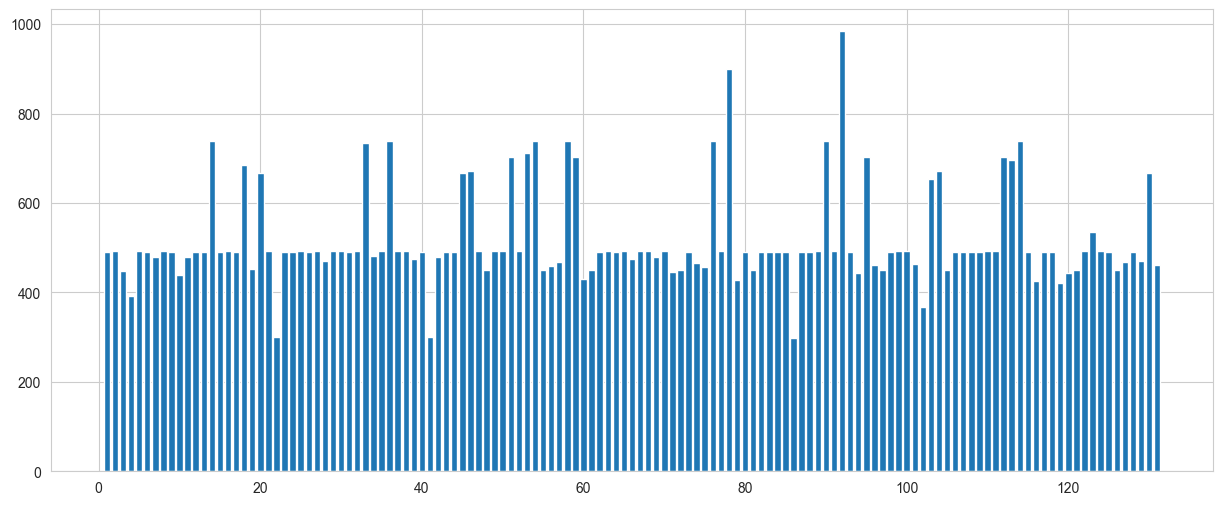

In [16]:
plt.figure(figsize=(15, 6))
x = []
y= []
i = 1
for label in all_labels:
    y.append(len( list(train_root.glob(label + "/*"))))
    x.append(i)
    i = i + 1
#plt.hist(number)
plt.bar(x, y)
plt.show()

In [17]:
# preparing the folders
os.mkdir("../dataextended")
os.mkdir("../dataextended/Training")
for folder in all_labels:
    os.mkdir("../dataextended/Training/" + folder)



In [18]:
# Counting the images to equilibrate the classes
minNum = 50000
for folder in all_labels:
    num = len(list(train_root.glob(folder + '/*')))
    if num < minNum:
        minNum = num
targetNum = minNum * 10
print(minNum)
print(targetNum)

297
2970


In [19]:
# Creating the Training images
for folder in all_labels:
    imagesDirInFolder = list(train_root.glob(folder + '/*'))
    num = len(imagesDirInFolder)
    numImagesToCreate = int(targetNum / num)

    j = 0
    for imageDir in imagesDirInFolder:
        img=plt.imread(imageDir)
        original = plt.imread(imageDir)

        #size = (img_width, img_height)
        #img = keras.preprocessing.image.smart_resize(img, size=size)
        #original = keras.preprocessing.image.smart_resize(original, size=size)

        #saving the original image on the extended dataset
        original = Image.fromarray(original.astype('uint8'))
        original.save("../dataextended/Training/" + folder + "/"+str(j)+'.jpg')
        j = j + 1

        # For processing, we are converting the image(s) to an array
        data = keras.preprocessing.image.img_to_array(img)

        # Expanding dimension to one sample
        samples = expand_dims(data, 0)

        it = datagen.flow(samples, batch_size=1)#, seed=j)

        for i in range(0, numImagesToCreate):
            batch = it.next()

            # Remember to convert these images to unsigned integers for viewing
            resultingImage = batch[0].astype('uint8')
            resultingImage = Image.fromarray(resultingImage)
            resultingImage.save("../dataextended/Training/" + folder + "/"+str(j)+'_' + str(i) + '.jpg')



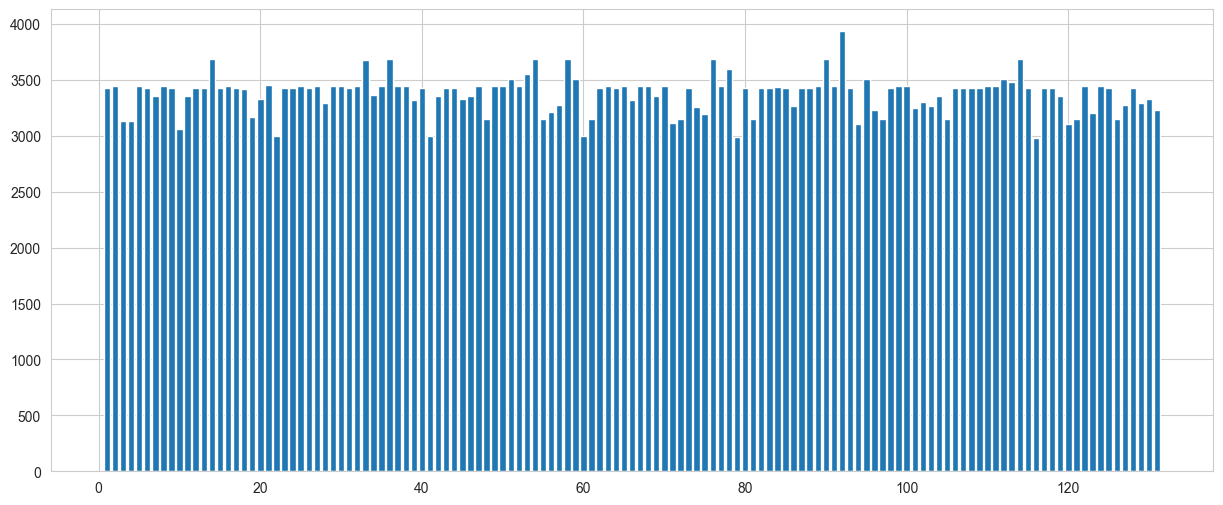

In [23]:
extended_train_root = pathlib.Path('../../FruitScale/dataextended/Training')
extended_train_root = extended_train_root.resolve()
plt.figure(figsize=(15, 6))
xx = []
yy= []
i = 1
for label in all_labels:
    yy.append(len( list(extended_train_root.glob(label + "/*"))))
    xx.append(i)
    i = i + 1

#plt.hist(number)
plt.bar(xx, yy)
plt.show()

In [21]:
os.mkdir("../dataextended/Test")
for folder in all_labels:
    os.mkdir("../dataextended/Test/" + folder)

In [22]:
# Creating the Test images (simply resizing them)
for folder in all_labels:
    imagesDirInFolder = list(test_root.glob(folder + '/*'))

    j = 0
    for imageDir in imagesDirInFolder:
        #img=plt.imread(imageDir)
        original = plt.imread(imageDir)

        #size = (img_width, img_height)
        #img = keras.preprocessing.image.smart_resize(img, size=size)
        #original = keras.preprocessing.image.smart_resize(original, size=size)

        #saving the original image on the extended dataset
        original = Image.fromarray(original.astype('uint8'))
        original.save("../dataextended/Test/" + folder + "/"+str(j)+'.jpg')
        j = j + 1